# DataProcessing

In [76]:
import numpy as np
import os
import pandas as pd
import copy
from matplotlib import pyplot as plt
import time
import warnings 
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
import seaborn as sns 

In [63]:
data = pd.read_csv(r'C:\Users\Mr.Xiao\Desktop\Telco-Customer-Churn.csv')
print(data.shape)
print(data["Churn"].value_counts())
data.head(5)

(7043, 21)
No     5174
Yes    1869
Name: Churn, dtype: int64


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [54]:
data.isnull().any()
data2 = copy.deepcopy(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
data['TotalCharges']=data['TotalCharges'].apply(pd.to_numeric,errors='coerce')
data['TotalCharges'].isnull().sum()

11

In [65]:
data['tenure'][data['TotalCharges'].isnull()]
#For use whose Totalcharges is 0, their tenure is 0 so there is no charge record,thus we could use monthlycharge to fill the blank
data['TotalCharges']=data['TotalCharges'].fillna(data['MonthlyCharges'])

## Outlier

In [6]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.798992
std,0.368612,24.559481,30.090047,2266.730170
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


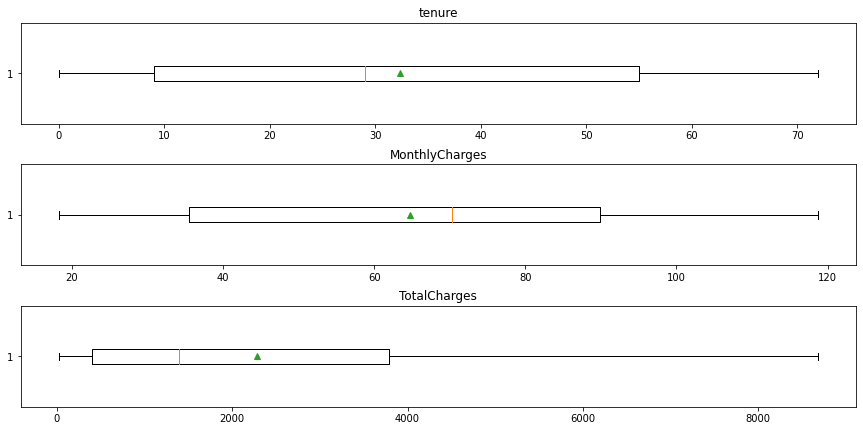

In [7]:
fig=plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(311)
list1=list(data['tenure'])
ax1.boxplot(list1,vert=False,showmeans=True)
ax1.set_title('tenure')

ax2 = fig.add_subplot(312)
list1=list(data['MonthlyCharges'])
ax2.boxplot(list1,vert=False,showmeans=True)
ax2.set_title('MonthlyCharges')

ax3 = fig.add_subplot(313)
list1=list(data['TotalCharges'])
ax3.boxplot(list1,vert=False,showmeans=True)
ax3.set_title('TotalCharges')

plt.tight_layout(pad=0.75)
plt.show()

## Data Visualization

'It is obvious that churn rate within senior citizen and dependents group are significantly higher'

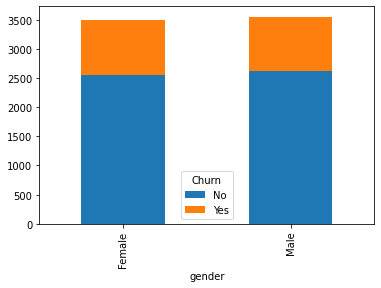

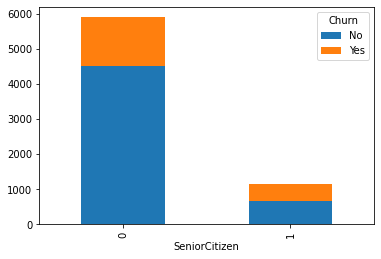

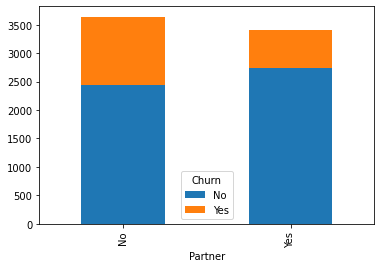

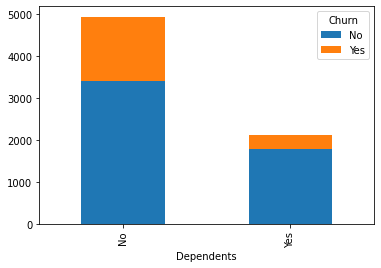

In [8]:
basic_characteristc = ['gender','SeniorCitizen','Partner','Dependents']
for i in basic_characteristc:
    cnt=pd.crosstab(data[i],data['Churn'])
    cnt.plot.bar(stacked=True)
    
'''It is obvious that churn rate within senior citizen and dependents group are significantly higher'''

In [9]:
tenure_churn = data[['tenure','Churn']]
tenure_churn['Churn']=tenure_churn['Churn'].map({'Yes':1,'No':0})
tenure_churn_rate = tenure_churn.groupby('tenure').sum()/tenure_churn.groupby(['tenure']).count()
tenure_churn_rate=tenure_churn_rate.reset_index()

'The churn rate is reduced toward 0.3 after 17 months usage'

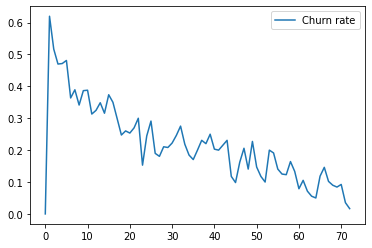

In [10]:
plt.figure()
plt.plot(tenure_churn_rate.iloc[:,0],tenure_churn_rate.iloc[:,1],label='Churn rate')
plt.legend()
'''The churn rate is reduced toward 0.3 after 17 months usage'''
# tenure_churn_rate<=0.30

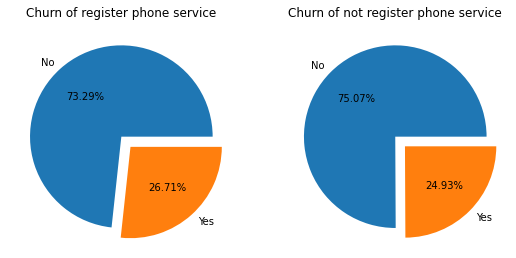

In [11]:
pos_phone = data[data['PhoneService']=='Yes']
neg_phone = data[data['PhoneService']=='No']

fig = plt.figure(figsize=(9,6))
ax1 = fig.add_subplot(121)
p1 = pos_phone['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.15))
ax1.set_title('Churn of register phone service')

ax2 = fig.add_subplot(122)
p1 = neg_phone['Churn'].value_counts()
ax2.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.15))
ax2.set_title('Churn of not register phone service')

_=plt.show()


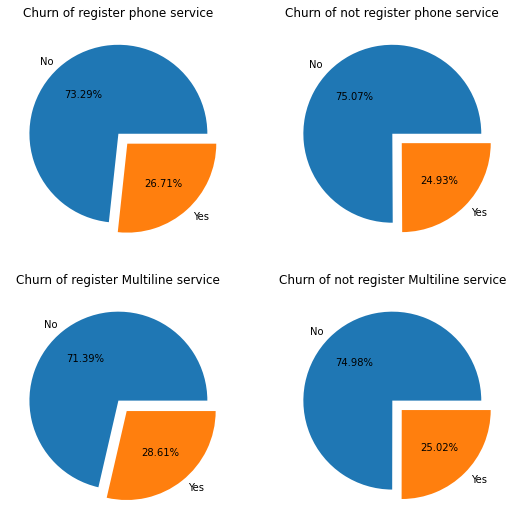

In [12]:
pos_phone = data[data['PhoneService']=='Yes']
neg_phone = data[data['PhoneService']=='No']
pos_multi = data[data['MultipleLines']=='Yes']
neg_multi = data[(data['MultipleLines']=='No')| (data['MultipleLines']=='No phone service')]

fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(221)
p1 = pos_phone['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.15))
ax1.set_title('Churn of register phone service')

ax2 = fig.add_subplot(222)
p1 = neg_phone['Churn'].value_counts()
ax2.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.15))
ax2.set_title('Churn of not register phone service')

ax3 = fig.add_subplot(223)
p1 = pos_multi['Churn'].value_counts()
ax3.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.15))
ax3.set_title('Churn of register Multiline service')

ax4 = fig.add_subplot(224)
p1 = neg_multi['Churn'].value_counts()
ax4.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.15))
ax4.set_title('Churn of not register Multiline service')

_=plt.show()


'The most users choose fiber optic while its churn rate is highest'

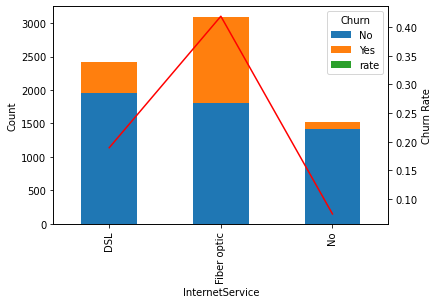

In [13]:
internet_churn=pd.crosstab(data['InternetService'],data['Churn'])
internet_churn['rate']=internet_churn['Yes']/(internet_churn['Yes']+internet_churn['No'])

fig,ax = plt.subplots()
internet_churn.plot.bar(stacked=True,ax=ax)
ax2=ax.twinx()
ax2.plot(internet_churn['rate'],color='red')
ax.set_ylabel('Count')
ax2.set_ylabel('Churn Rate')
'''The most users choose fiber optic while its churn rate is highest'''

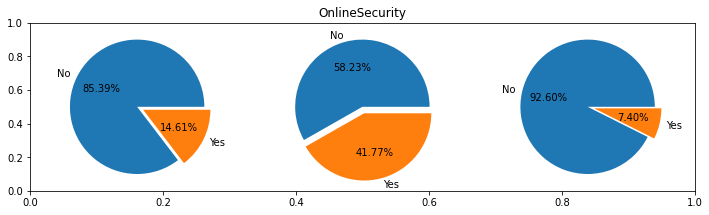

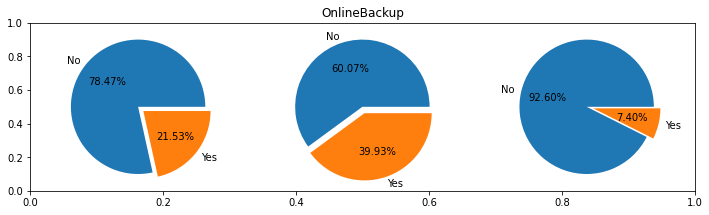

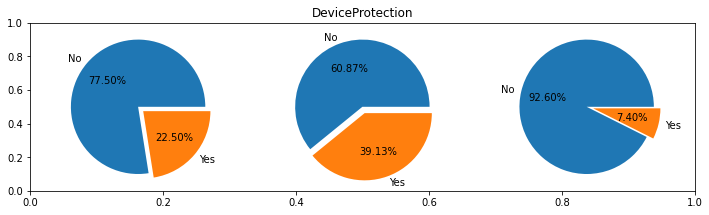

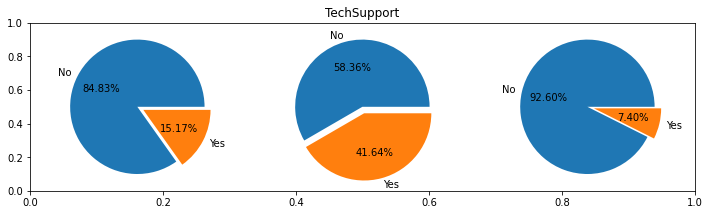

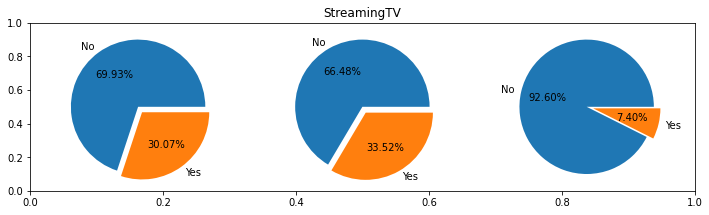

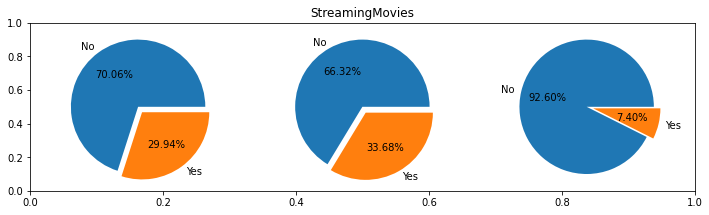

'There is significant difference upon online-service and tech support, while not on streaming service'

In [14]:
internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

for i in internetCols:
    df1 = data[data[i] == 'Yes']
    df2 = data[data[i] == 'No']
    df3 = data[data[i] == 'No internet service']

    fig = plt.figure(figsize=(10,3))
    plt.title(i)
    
    ax1 = fig.add_subplot(131)
    p1 = df1['Churn'].value_counts()
    ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))  

    ax2 = fig.add_subplot(132)
    p2 = df2['Churn'].value_counts()
    ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    

    ax3 = fig.add_subplot(133)
    p3 = df3['Churn'].value_counts()
    ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))    
  
    plt.tight_layout(0.75)    
    plt.show() 

'''There is significant difference upon online-service and tech support, while not on streaming service'''

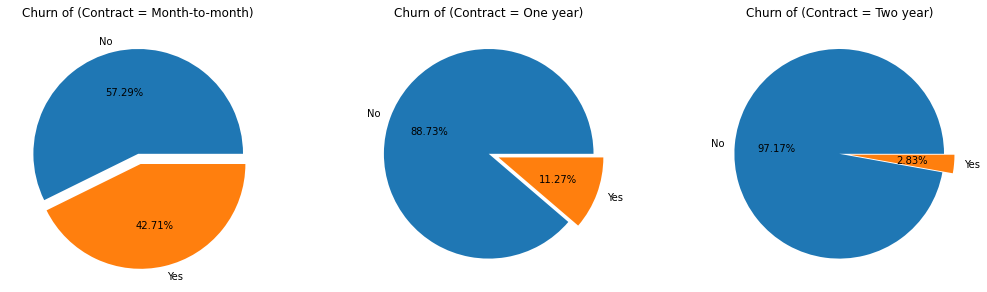

'It is highly recommend the longer contact for user'

In [15]:

df1 = data[data['Contract'] == 'Month-to-month']
df2 = data[data['Contract'] == 'One year']
df3 = data[data['Contract'] == 'Two year']
fig = plt.figure(figsize=(15,4)) 

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (Contract = Month-to-month)')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (Contract = One year)')

ax3 = fig.add_subplot(133)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (Contract = Two year)')

plt.tight_layout(pad=0.5)    
plt.show()
'''It is highly recommend the longer contact for user'''

Text(0.5, 1.0, 'Non Paperless Billing')

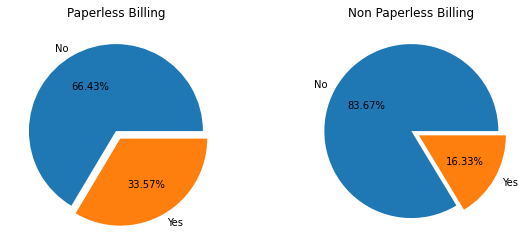

In [16]:
df1 = data[data['PaperlessBilling'] == 'Yes']
df2 = data[data['PaperlessBilling'] == 'No']

fig = plt.figure(figsize=(15,4)) 

ax1 = fig.add_subplot(131)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Paperless Billing')

ax2 = fig.add_subplot(132)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Non Paperless Billing')


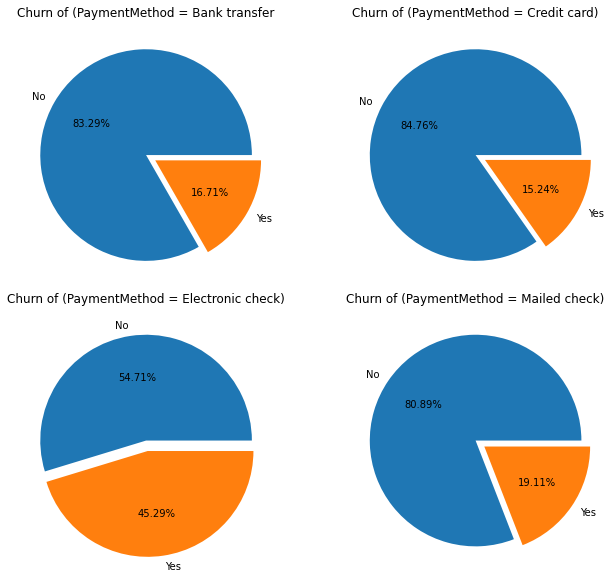

In [17]:

df1 = data[data['PaymentMethod'] == 'Bank transfer (automatic)']    
df2 = data[data['PaymentMethod'] == 'Credit card (automatic)']    
df3 = data[data['PaymentMethod'] == 'Electronic check']    
df4 = data[data['PaymentMethod'] == 'Mailed check']   

fig = plt.figure(figsize=(10,8)) 

ax1 = fig.add_subplot(221)
p1 = df1['Churn'].value_counts()
ax1.pie(p1,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax1.set_title('Churn of (PaymentMethod = Bank transfer')

ax2 = fig.add_subplot(222)
p2 = df2['Churn'].value_counts()
ax2.pie(p2,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax2.set_title('Churn of (PaymentMethod = Credit card)')

ax3 = fig.add_subplot(223)
p3 = df3['Churn'].value_counts()
ax3.pie(p3,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax3.set_title('Churn of (PaymentMethod = Electronic check)')

ax4 = fig.add_subplot(224)
p4 = df4['Churn'].value_counts()
ax4.pie(p4,labels=['No','Yes'],autopct='%1.2f%%',explode=(0,0.1))
ax4.set_title('Churn of (PaymentMethod = Mailed check)')

plt.tight_layout(pad=0.5)  
plt.show() 

In [20]:
cross_tab = pd.crosstab(data['PaperlessBilling'], data['PaymentMethod'])

In [18]:
Payment_Churn = data[['PaperlessBilling','PaymentMethod','Churn']]
Payment_Churn['Churn']=Payment_Churn['Churn'].map({'Yes':1,'No':0})
pd.pivot_table(Payment_Churn, values='Churn', index='PaperlessBilling', columns='PaymentMethod', aggfunc='sum', fill_value=0)

PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
PaperlessBilling,,,,
No,72,64,204,129
Yes,186,168,867,179


In [21]:
pd.pivot_table(Payment_Churn, values='Churn', index='PaperlessBilling', columns='PaymentMethod', aggfunc='sum', fill_value=0)/cross_tab


PaymentMethod,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
PaperlessBilling,,,,
No,0.110260,0.100000,0.327448,0.134937
Yes,0.208754,0.190476,0.497704,0.272866


In [22]:
'''We can see that paperless billing presents higher churn rate and electronic chekc is the most popular payment method and highest propotition of paperless billing '''
(cross_tab.iloc[1,:]/cross_tab.sum(axis=0)).sort_values()

PaymentMethod
Mailed check                 0.406948
Bank transfer (automatic)    0.577073
Credit card (automatic)      0.579501
Electronic check             0.736575
dtype: float64

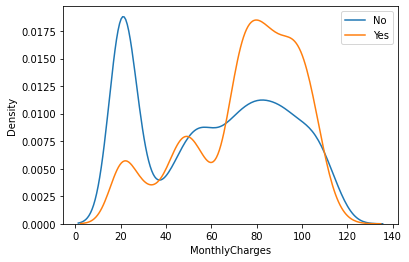

In [23]:
plt.figure()
neg_df = data[data['Churn']=='No']
pos_df = data[data['Churn']=='Yes']
sns.distplot(neg_df['MonthlyCharges'],hist=False,label='No')
sns.distplot(pos_df['MonthlyCharges'],hist=False,label='Yes')
plt.legend()

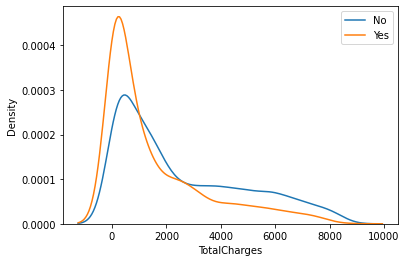

In [24]:
sns.distplot(neg_df['TotalCharges'],hist=False,label='No')
sns.distplot(pos_df['TotalCharges'],hist=False,label='Yes')
plt.legend()

# Feature Engineering

## Feature Extraction

In [25]:
from sklearn.preprocessing import StandardScaler 

In [66]:
#Continuous Features
scaler = StandardScaler()
scaler_list = ['tenure','MonthlyCharges','TotalCharges']
for i in scaler_list:
    data[[i]]=scaler.fit_transform(data[[i]])
    


In [67]:
#Discrete Features

data.loc[data['MultipleLines']=='No phone service', 'MultipleLines'] = 'No'

internetCols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
for i in internetCols:
    data.loc[data[i]=='No internet service', i] = 'No'

encodeCols = list(data.columns[3: 17].drop(['tenure', 'PhoneService', 'InternetService', 'StreamingTV', 'StreamingMovies', 'Contract']))     
for i in encodeCols:
    data[i] = data[i].map({'Yes': 1, 'No': 0})     
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})


In [68]:
onehotCols = ['InternetService', 'Contract', 'PaymentMethod']
churnDf = data['Churn'].to_frame()    
featureDf = data.drop(['Churn'], axis=1)  

for i in onehotCols:
    onehotDf = pd.get_dummies(featureDf[i],prefix=i) 
    featureDf = pd.concat([featureDf, onehotDf],axis=1) 

data = pd.concat([featureDf, churnDf],axis=1)    
data = data.drop(onehotCols, axis=1) 

In [69]:
data = data.drop(['customerID','gender','PhoneService','StreamingMovies','StreamingTV'],axis=1)

## Colinearity

<AxesSubplot:>

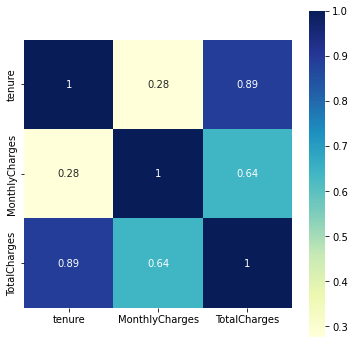

In [47]:
co = data[['tenure','MonthlyCharges','TotalCharges']]
pearson_mat = co.corr(method='spearman')
plt.figure(figsize=(6,6))
sns.heatmap(pearson_mat,square=True,annot=True,cmap='YlGnBu')

In [70]:
data = data.drop(['TotalCharges'],axis=1)

In [71]:
data['MultipleLines'].value_counts().sum()

7043

In [74]:
data.to_csv('./processd_data.csv',index=False)